# Data Science & Machine Learning
### Sandip Mahesh Randive                                  
### Email_id                                : sandiprandive75@gmail.com
### Mobile number                  : 9096548359
### Pune, Maharashtra

## Predicting Fraud in Financial Payment Services
The main technical challenge it poses to predicting fraud is the highly imbalanced distribution between positive and negative classes in 6 million rows of data. Another stumbling block to the utility of this data stems from the possible discrepancies in its description. The goal of this analysis is to solve both these issues by a detailed data exploration and cleaning followed by choosing a suitable machine-learning algorithm to deal with the skew. I show that an optimal solution based on feature-engineering.

## Importing Standard Libraries

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [194]:
df = pd.read_csv('D:/Internshala/Fraud.csv')

In [195]:
#preview dataset
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Preprocessing & Exploratory Data Analysis

In [196]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [198]:
#checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [199]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [200]:
df.shape

(6362620, 11)

In [201]:
#show all columns
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [202]:
#getting unique features from categorical data
print(f'Total Number Of Unique Values present in Type Column : {data.type.unique()}')
print(f'Total Number Of Unique Values present in isFraud Column : {data.isFraud.unique()}')

Total Number Of Unique Values present in Type Column : ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Total Number Of Unique Values present in isFraud Column : [0 1]


In [203]:
#removing unnecessary columns
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1, inplace = True)

## Relation Between independent features and dependant features

In [204]:
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['step', 'type']

In [205]:
group = df.groupby(['isFraud', 'type'])
group.count()

step   amount  oldbalanceOrg  newbalanceOrig  \
isFraud type                                                        
0       CASH_IN   1399284  1399284        1399284         1399284   
        CASH_OUT  2233384  2233384        2233384         2233384   
        DEBIT       41432    41432          41432           41432   
        PAYMENT   2151495  2151495        2151495         2151495   
        TRANSFER   528812   528812         528812          528812   
1       CASH_OUT     4116     4116           4116            4116   
        TRANSFER     4097     4097           4097            4097   

                  oldbalanceDest  newbalanceDest  
isFraud type                                      
0       CASH_IN          1399284         1399284  
        CASH_OUT         2233384         2233384  
        DEBIT              41432           41432  
        PAYMENT          2151495         2151495  
        TRANSFER          528812          528812  
1       CASH_OUT            4116            4116  
        TRANSFER            4097            4097

In [206]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

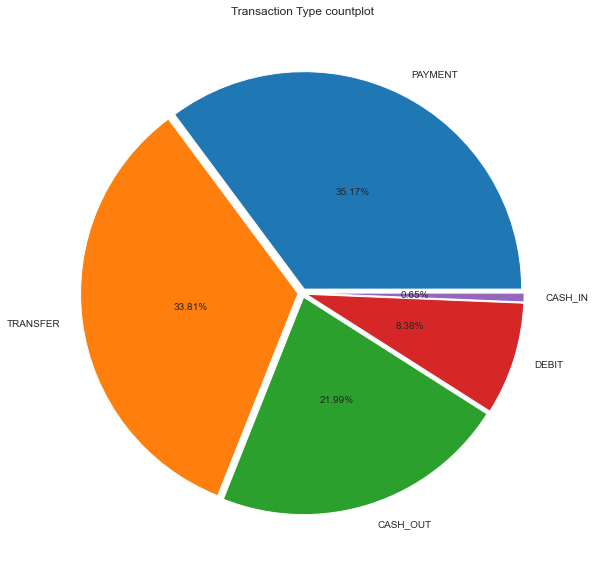

In [207]:
#Plotting count plot according to category 
sns.set_style("darkgrid")
plt.figure(figsize = (12, 10))
plt.pie(df.type.value_counts(), labels = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],autopct='%.2f%%', pctdistance=0.5, explode=[0.02]*5)
plt.title('Transaction Type ' + 'countplot')
plt.show()

## Distribustion of Continuous Features

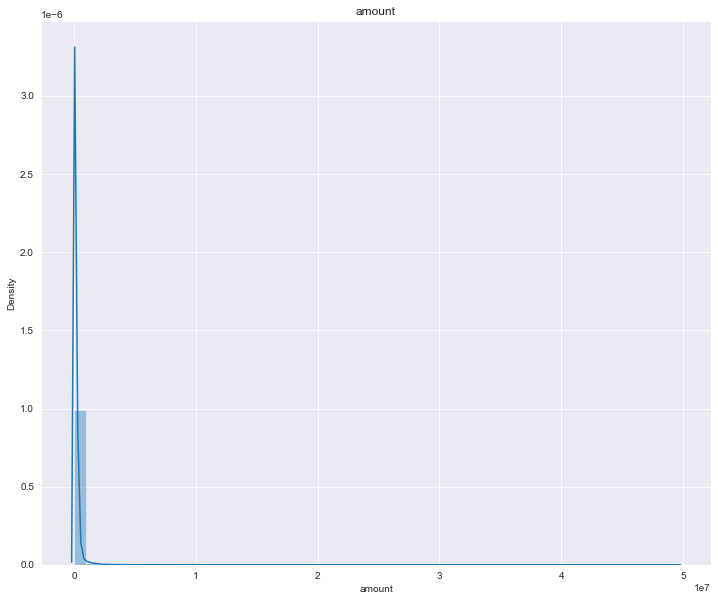

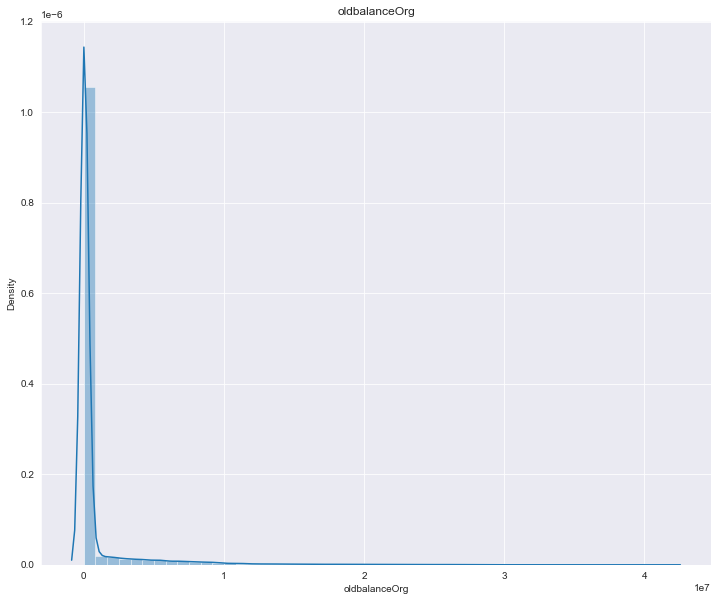

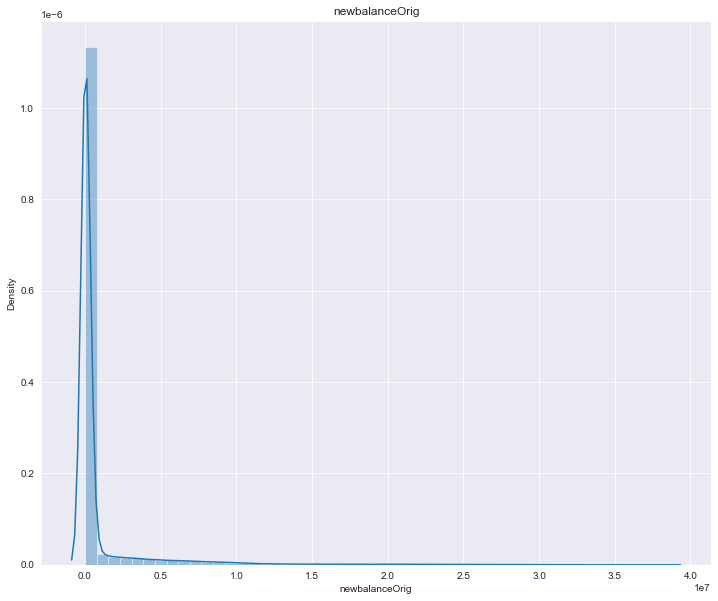

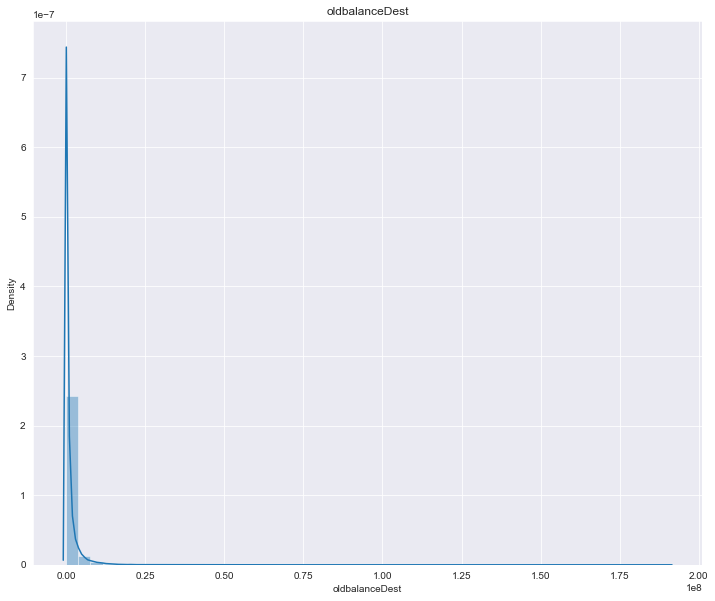

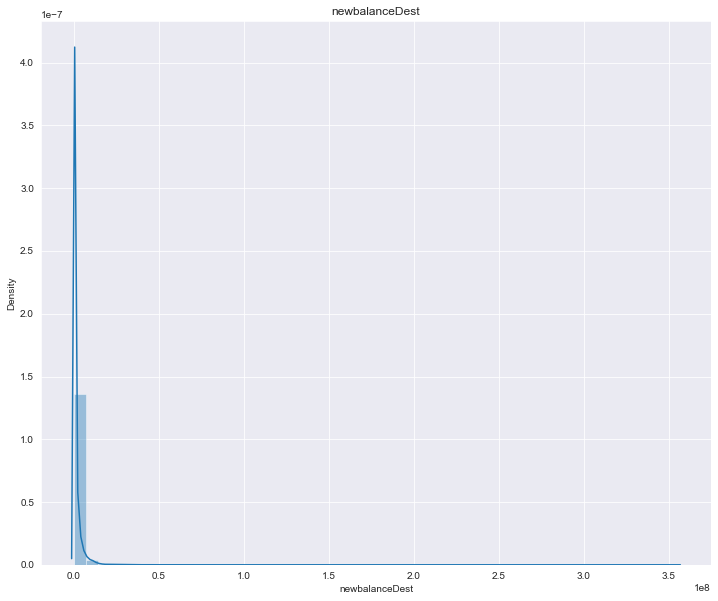

In [208]:
#showing distribution of numerical variables
for feature in numeric_features:
    plt.figure(figsize = (12, 10))
    sns.distplot(df[feature].sample(100000))
    plt.title(feature)
    plt.show()

above histogram shows the distribution of continuous variables. It is showing that features is not normally distributed and all the data is right screw. we have to apply logarithmic transformation.

## coverting data1 into logarithmic format Plotting Graph

In [209]:
df2 = df.copy()
#from numpy import ufunc
for feature in numeric_features:
    #coverting data1 into logarithmic format
    df2[feature] = np.log1p(df2[feature])

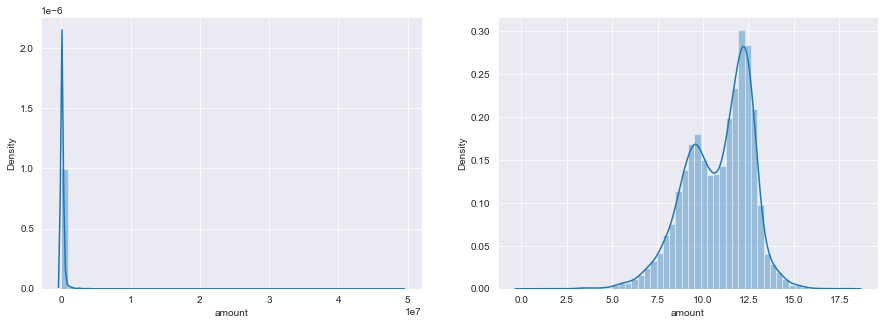

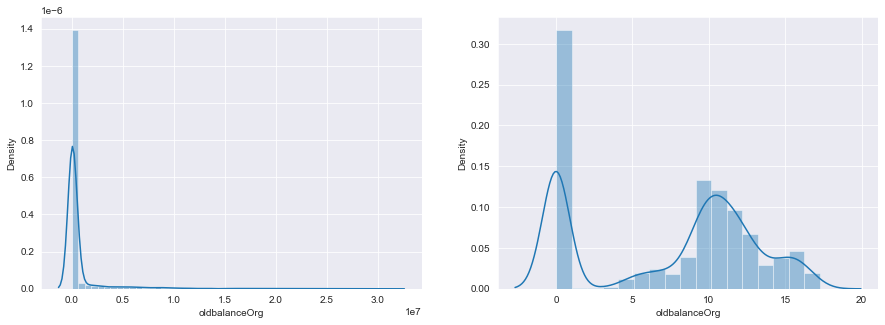

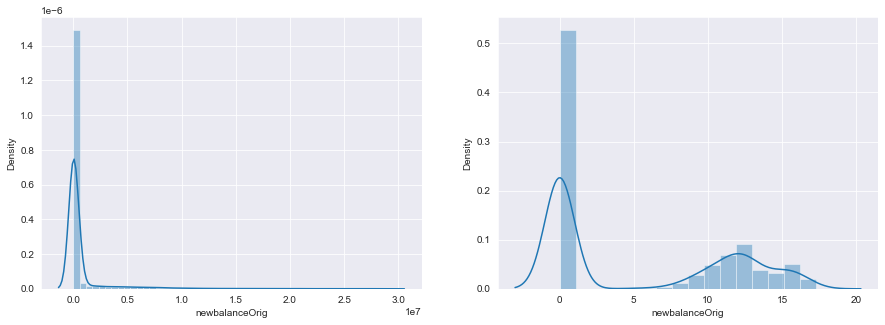

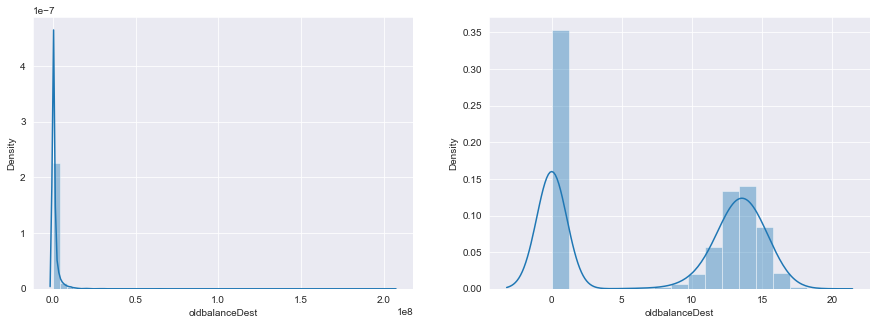

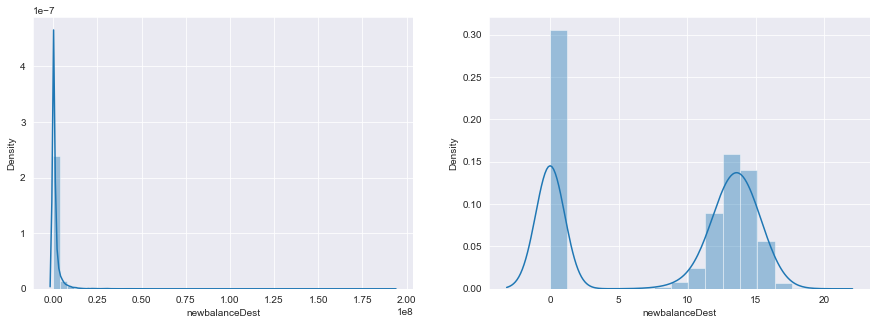

In [210]:
for feature in numeric_features:
    #before transformation
    plt.figure(figsize = (15, 5))
    plt.subplot(121)
    sns.distplot(df[feature].sample(10000))
    
    #after transformation
    plt.subplot(122)
    sns.distplot(df2[feature].sample(10000))
    plt.show()

In [211]:
df2.sample(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1192658,132,CASH_IN,11.879781,16.404365,16.415146,15.288512,15.298137,0
5676835,397,CASH_OUT,9.964260,0.000000,0.000000,11.239043,11.485495,0
4952374,351,CASH_OUT,11.136473,0.000000,0.000000,15.282571,15.298272,0
1537220,154,PAYMENT,5.130490,5.598422,4.623992,0.000000,0.000000,0
3615869,273,CASH_IN,11.831709,15.448574,15.475086,12.269654,11.233011,0
1206817,133,PAYMENT,7.778588,9.701188,9.543170,0.000000,0.000000,0
3095192,235,PAYMENT,9.328376,0.000000,0.000000,0.000000,0.000000,0
4606702,329,PAYMENT,9.454769,0.000000,0.000000,0.000000,0.000000,0
2851883,227,PAYMENT,8.885300,12.441453,12.412493,0.000000,0.000000,0
1491200,142,PAYMENT,10.028606,10.815156,10.207464,0.000000,0.000000,0


## Multi-collinearity

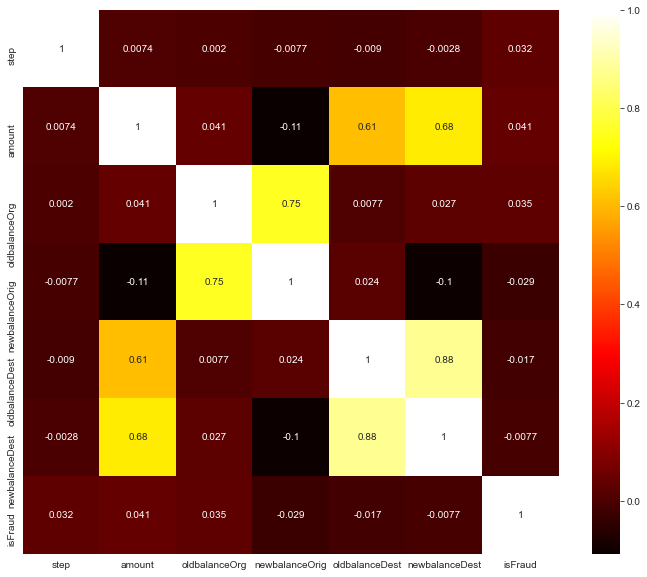

In [212]:
#finding correalation between numeric features
plt.figure(figsize = (12, 10))
cor = df2.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.hot)
plt.show()

After look at above heatmap show correlation between features. 
'oldbalanceorg' and 'newbalanceOrig' repressents a very high which is equal to 0.75.
'oldbalanceDest' and 'newbalanceDest' repressents a very high which is nearly equal to 0.88.

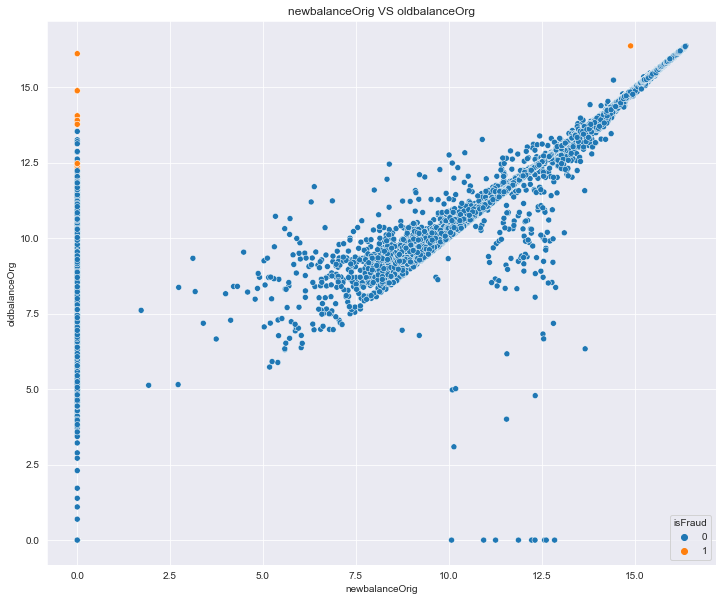

In [213]:
#showing sctterplot to find out the relation betweeen  'oldbalanceorg' and 'newbalanceOrig'
plt.figure(figsize = (12, 10))
sns.scatterplot(df2['newbalanceOrig'].head(10000), df2['oldbalanceOrg'].head(10000), hue = df2['isFraud'].head(10000))
plt.title('newbalanceOrig VS oldbalanceOrg')
plt.show()

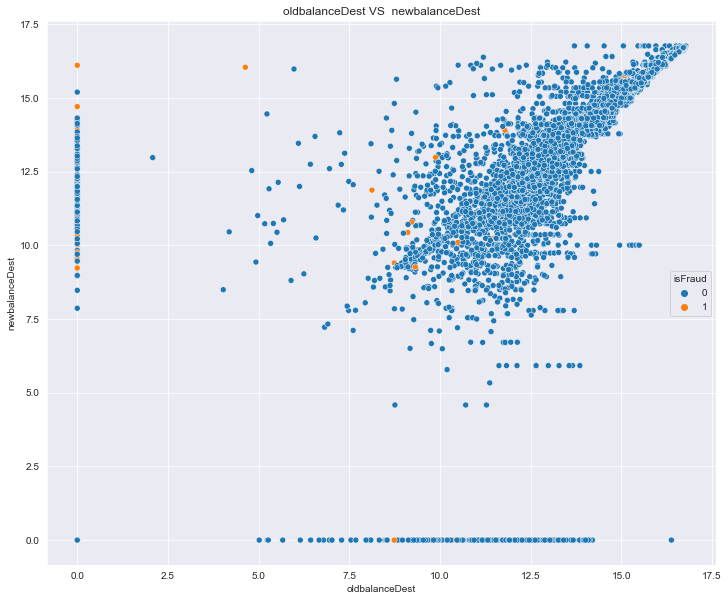

In [214]:
#showing sctterplot to find out the relation betweeen  'oldbalanceDest' and 'newbalanceDest'
plt.figure(figsize = (12, 10))
sns.scatterplot(df2['oldbalanceDest'].head(10000), df2['newbalanceDest'].head(10000), hue = df2['isFraud'].head(10000))
plt.title('oldbalanceDest VS  newbalanceDest')
plt.show()

In [215]:
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9.194276,12.044359,11.984786,0.000000,0.0,0
1,1,PAYMENT,7.531166,9.964112,9.872292,0.000000,0.0,0
2,1,TRANSFER,5.204007,5.204007,0.000000,0.000000,0.0,1
3,1,CASH_OUT,5.204007,5.204007,0.000000,9.960954,0.0,1
4,1,PAYMENT,9.364703,10.634773,10.305174,0.000000,0.0,0


In [216]:
#splittig data 
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [217]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9.194276,12.044359,11.984786,0.000000,0.0
1,1,PAYMENT,7.531166,9.964112,9.872292,0.000000,0.0
2,1,TRANSFER,5.204007,5.204007,0.000000,0.000000,0.0
3,1,CASH_OUT,5.204007,5.204007,0.000000,9.960954,0.0
4,1,PAYMENT,9.364703,10.634773,10.305174,0.000000,0.0


## Handling Categorical Data and Standardization of continuous features

In [218]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [219]:
#converting categorical data into numerical format for machine to better recognition
le = LabelEncoder()
le.fit(X['type'])
X['type'] = le.transform(X['type'])

In [220]:
#standardising nuerical continuous data for better model prediction and machine recognition 
sc = StandardScaler()
sc.fit(X[['step','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest']])
X[['step','amount','oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest']] = sc.transform(X[['step','amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest']])

# Impotancy of Independant Features Using Extra Trees Classifier
### For feature selection
In this step, we are going to find out how important is independant features while predicting dependant feature. 

In [221]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier()

In [222]:
model.feature_importances_

array([0.10044423, 0.1480721 , 0.15077784, 0.24834006, 0.04478797,
       0.05803944, 0.24953836])

In [223]:
imp_score = pd.DataFrame(model.feature_importances_, index = X.columns, columns = ['score'])
imp_score.sort_values(by = 'score', ascending = False)

,score
newbalanceDest,0.249538
oldbalanceOrg,0.248340
amount,0.150778
type,0.148072
step,0.100444
oldbalanceDest,0.058039
newbalanceOrig,0.044788


### Above table is showing role of independant variable for predicting dependant variable.
'step', 'newbalanceOrig' and 'oldbalanceDest' having a very low score which feature has low importance according to "ExtraTreesClassifier".
so we are removing 'step', 'newbalanceOrig' and 'oldbalanceDest' features.

In [224]:
#deleting less important columns to avoid multicollinearity
X.drop(['step', 'newbalanceOrig', 'oldbalanceDest'], axis = 1, inplace = True)

In [225]:
X.head()

,type,amount,oldbalanceOrg,newbalanceDest
0,3,-0.907462,0.816576,-1.248013
1,3,-1.824023,0.449673,-1.248013
2,4,-3.106552,-0.389888,-1.248013
3,1,-3.106552,-0.389888,-1.248013
4,3,-0.813537,0.567961,-1.248013


In [226]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [227]:
y = pd.DataFrame(y, columns = ['isFraud'])

In [228]:
y.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

### Handling Imbalance Data
Data is imbalanced. So we are applying udersampling to get good results.

In [229]:
#importing under sampling library to manage datase
from imblearn.under_sampling import RandomUnderSampler
rand_sample = RandomUnderSampler(random_state = 5)

In [230]:
X_res, y_res = rand_sample.fit_resample(X, y)

In [231]:
print(X_res.shape, y_res.shape)

(16426, 4) (16426, 1)


In [232]:
print(y.value_counts(), y_res.value_counts())

isFraud
0          6354407
1             8213
dtype: int64 isFraud
0          8213
1          8213
dtype: int64


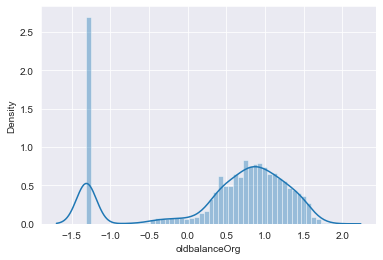

In [233]:
sns.distplot(X_res['oldbalanceOrg'])
plt.show()

### train test split

In [234]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.30, random_state = 5)

### Model Selection

In [235]:
#importing machine learning library 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [236]:
from sklearn.model_selection import GridSearchCV

In [237]:
model_params = {
    'KNN':{'model' : KNeighborsClassifier(),
          'params' : {'n_neighbors' : [3, 4, 5, 6], 
                       'p'  : [1, 2]
                     }
          },
    'SVC':{'model' : SVC(gamma ='auto'),
           'params' : {'C' : [1, 5, 10, 20],
                       'kernel': ['rbf', 'linear']
                      }               
           },
    'RandomForest':{'model' : RandomForestClassifier(),
                    'params' : {'n_estimators' : [10, 15, 25, 50]                       
                    }
           }
        
    }

In [238]:
scores = []

for model_name, mp in model_params.items():
    classifier = GridSearchCV(mp['model'], mp['params'], cv = 5)
    classifier.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : classifier.best_score_,
        'best_params' : classifier.best_params_
    }
    )

In [239]:
score_df = pd.DataFrame(scores)
score_df

,model,best_score,best_params
0,KNN,0.979301,"{'n_neighbors': 3, 'p': 2}"
1,SVC,0.968517,"{'C': 20, 'kernel': 'rbf'}"
2,RandomForest,0.987824,{'n_estimators': 10}


So we are going to select Random Forest Classifier for Prediction 

### Model Prediction

In [240]:
classifier_RF = RandomForestClassifier(n_estimators= 50, criterion = 'entropy', random_state = 5)
classifier_RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=5)

In [241]:
y_pred = classifier_RF.predict(X_test)

### Accuracy Checking

In [242]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [243]:
confusion_matrix(y_test, y_pred)

array([[2410,   41],
       [   9, 2468]], dtype=int64)

In [244]:
accuracy_score(y_test, y_pred)

0.9898538961038961

In [245]:
class_report = classification_report(y_test, y_pred, output_dict =True)

In [246]:
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.996279,0.983659,0.989854,0.989969,0.989936
recall,0.983272,0.996367,0.989854,0.989819,0.989854
f1-score,0.989733,0.989972,0.989854,0.989852,0.989853
support,2451.000000,2477.000000,0.989854,4928.000000,4928.000000


# Conclussion

We will be select decision tree model.
In this task we have tried to do fraud detection on a bank payment data and we have achieved remarkable results with our classifiers. Since fraud datasets have an imbalance class problem we performed an undersampling technique called RandomUnderSampler and generated new minority class examples.

In [247]:
#Thank You!